# 📊 Data Science & ML Survey Analysis (2017–2021)  

**Objective:**  
Analyze the **Kaggle Machine Learning & Data Science Survey** to understand respondent demographics, education, professional background, and geographic distribution.  
This includes **data cleaning, categorical unification, feature engineering, and visualizations** to uncover meaningful patterns in the data science community.  

**Dataset Source:**  [Kaggle ML & DS Survey](https://www.kaggle.com/kaggle-survey-2017)   
- Covers responses from data scientists worldwide (2017–2021).  
- Features include demographics, education, employment, tools, and salary.  
- ~20,000+ responses per year.  

**Steps Performed:**  
- 🧹 **Data Cleaning** → handled missing values, dropped duplicates, removed inconsistencies.  
- 🏷️ **Categorical Standardization** → unified spelling differences. 
- 🌍 **Mapping**
- 🛠️ **Feature Engineering**
- 📊 **Visualizations** 

**Libraries Used:**  
- **Pandas** → data cleaning & feature engineering  
- **Matplotlib** → bar plots, line plots  
- **Seaborn** → advanced plots (heatmaps, countplots)  


## Import Libraries

In [78]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning / preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Display settings (optional, for cleaner output)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## Load Dataset

In [79]:
df_raw = pd.read_csv("C:/Users/Tech Zone/Desktop/Survey/kaggle_survey_2017_2021.csv",header=[1], dtype=str, low_memory=False)

In [80]:
df = df_raw.copy()

In [81]:
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio / Visual Studio Code,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Kaggle Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Colab Notebooks,Which of the following hosted notebook products do you use on a regular basis? 

In [82]:
print("Shape after load:", df.shape)
print("Sample columns:", list(df.columns[:12]))

Shape after load: (106301, 293)
Sample columns: ['Year', 'Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C']


## Basic cleaning (whitespace, fake header row, duplicates)

In [83]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [84]:
if "Year" in df.columns and (str(df.loc[df.index[0], "Year"]).lower() == "year"):
    df = df.iloc[1:].reset_index(drop=True)

In [85]:
df = df.drop_duplicates().reset_index(drop=True)

**- Strip extra spaces from all string columns**  
**- Drop duplicate header row if it exists**  
**- Drop exact duplicate rows**  

In [86]:
# Print shape after cleaning
print("Shape after basic cleaning:", df.shape)

Shape after basic cleaning: (101845, 293)


### Creating a mapping dictionary

In [87]:
col_map = {
    "Year": "year",
    "What is your age (# years)?": "age",
    "What is your gender? - Selected Choice": "gender",
    "In which country do you currently reside?": "country",
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?": "education",
    "Select the title most similar to your current role (or most recent title if retired): - Selected Choice": "job_role",
    "For how many years have you been writing code and/or programming?": "coding_exp",
    "What is the size of the company where you are employed?": "company_size",
    "Does your current employer incorporate machine learning methods into their business?": "ml_use",
    "What is your current yearly compensation (approximate $USD)?": "salary"
}

missing = [c for c in col_map if c not in df.columns]
if missing:
    print("⚠️ Missing expected columns:", missing)

df = df[[c for c in col_map if c in df.columns]].rename(columns=col_map)

In [88]:
print("Using columns:", list(df.columns)) 

Using columns: ['year', 'age', 'gender', 'country', 'education', 'job_role', 'coding_exp', 'company_size', 'ml_use', 'salary']


In [89]:
country_map = {
    # USA variations
    "United States of America": "USA",
    "United States": "USA",
    "US": "USA",
    "U.S.": "USA",
    "USA": "USA",

    # UK variations
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Great Britain": "UK",
    "United Kingdom": "UK",
    "England": "UK",

    # Other common cleaning
    "Mainland China": "China",
    "People's Republic of China": "China",
    "Republic of India": "India"
}

if "country" in df.columns:
    df["country"] = df["country"].replace(country_map)

    df["country"] = df["country"].fillna("Unknown")

    top_countries = df["country"].value_counts().nlargest(10).index
    df["country"] = df["country"].apply(lambda x: x if x in top_countries else "Other")


In [90]:
if "gender" in df.columns:
    gender_map = {
        "Male": "Male",
        "Man": "Male",
        "M": "Male",
        "Female": "Female",
        "Woman": "Female",
        "F": "Female",
        "Nonbinary": "Non-binary",
        "Non-binary": "Non-binary",
        "Prefer to self-describe": "Self-describe",
        "Prefer not to say": "Prefer not to say"
    }

    df["gender"] = df["gender"].replace(gender_map).fillna("Unknown")


In [91]:
if "ml_use" in df.columns:
    df["ml_use"] = df["ml_use"].replace({
        "Yes": "Yes",
        "No": "No",
        "I do not know": "Not sure",
        "Don't know": "Not sure",
        "Not sure": "Not sure"
    }).fillna("Unknown")

In [92]:
if "education" in df.columns:
    edu_map = {
        # Bachelors
        "Bachelor’s degree": "Bachelors",
        "Bachelor's degree": "Bachelors",
        "Bachelorâ€™s degree": "Bachelors",
        "Bachelors": "Bachelors",

        # Masters
        "Master’s degree": "Masters",
        "Master's degree": "Masters",
        "Masterâ€™s degree": "Masters",
        "Masters": "Masters",

        # Doctorate
        "Doctoral degree": "Doctorate",
        "PhD": "Doctorate",

        # Professional degree
        "Professional degree": "Professional",

        # Other education levels
        "Some college/university study without earning a bachelor’s degree": "Some College",
        "Some college/university study without earning a bachelor's degree": "Some College",
        "Some college/university study without earning a bachelorâ€™s degree": "Some College",

        "No formal education past high school": "High School",
        "I prefer not to answer": "Prefer not to say"
    }

    df["education"] = df["education"].replace(edu_map).fillna("Unknown")



In [93]:
df.head()

,year,age,gender,country,education,job_role,coding_exp,company_size,ml_use,salary
0,2021,50-54,Male,India,Bachelors,Other,5-10 years,50-249 employees,No (we do not use ML methods),"25,000-29,999"
1,2021,50-54,Male,Other,Masters,Program/Project Manager,20+ years,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999"
2,2021,22-24,Male,Other,Masters,Software Engineer,1-3 years,"1000-9,999 employees",Not sure,$0-999
3,2021,45-49,Male,Other,Doctorate,Research Scientist,20+ years,"1000-9,999 employees",Not sure,"30,000-39,999"
4,2021,45-49,Male,India,Doctorate,Other,< 1 years,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999"


## Feature engineering (Age groups, Experience buckets, Salary buckets, Top-10 Country)

In [94]:
# Age group standardization 
if "age" in df.columns:
    df["age_group"] = df["age"].replace({
        "18-21": "18-24",
        "22-24": "18-24",
        "25-29": "25-29",
        "30-34": "30-34",
        "35-39": "35-39",
        "40-44": "40-49",
        "45-49": "40-49",
        "50-54": "50-59",
        "55-59": "50-59",
        "60-69": "60+",
        "70+": "60+",
        "Unknown": "Unknown"
    })


In [95]:
# Coding experience → normalize common Kaggle labels
if "coding_exp" in df.columns:
    df["coding_exp_clean"] = df["coding_exp"].replace({
        "I have never written code": "0 years",
        "I have never written code in my life": "0 years",
        "< 1 years": "<1 year",
        "< 1 year": "<1 year",
        "1-2 years": "1-2 years",
        "3-5 years": "3-5 years",
        "5-10 years": "5-10 years",
        "10-20 years": "10-20 years",
        "20+ years": "20+ years"
    }).fillna("Unknown")

In [96]:
if "company_size" in df.columns:
    df["company_size_band"] = df["company_size"].replace({
        "0-49 employees": "Small (<50)",
        "50-249 employees": "Medium (50-249)",
        "250-999 employees": "Large (250-999)",
        "1000-9,999 employees": "Enterprise (1k-9,999)",
        "10,000 or more employees": "Enterprise (10k+)"
    }).fillna("Unknown")

In [97]:
# Salary buckets
if "salary" in df.columns:
    # If already ranges like "$0-9,999", keep; otherwise attempt to coerce
    def clean_salary(s):
        if pd.isna(s): return "Unknown"
        s = str(s)
        # Already a range
        if "-" in s or "$" in s: 
            return s
        # If numeric-ish, bin it
        s2 = "".join(ch for ch in s if ch.isdigit())
        if s2 == "": return "Unknown"
        v = int(s2)
        if v < 10000: return "<$10k"
        elif v < 30000: return "$10k-$29k"
        elif v < 50000: return "$30k-$49k"
        elif v < 100000: return "$50k-$99k"
        elif v < 150000: return "$100k-$149k"
        elif v < 200000: return "$150k-$199k"
        else: return "$200k+"
    df["salary_bucket"] = df["salary"].apply(clean_salary)

In [98]:
# Country → keep Top 10 and group rest into "Other"
if "country" in df.columns:
    top10 = df["country"].value_counts().head(10).index
    df["country_top10"] = df["country"].apply(lambda x: x if x in top10 else "Other")

In [99]:
df.head(10)

,year,age,gender,country,education,job_role,coding_exp,company_size,ml_use,salary,age_group,coding_exp_clean,company_size_band,salary_bucket,country_top10
0,2021,50-54,Male,India,Bachelors,Other,5-10 years,50-249 employees,No (we do not use ML methods),"25,000-29,999",50-59,5-10 years,Medium (50-249),"25,000-29,999",India
1,2021,50-54,Male,Other,Masters,Program/Project Manager,20+ years,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",50-59,20+ years,"Enterprise (1k-9,999)","60,000-69,999",Other
2,2021,22-24,Male,Other,Masters,Software Engineer,1-3 years,"1000-9,999 employees",Not sure,$0-999,18-24,1-3 years,"Enterprise (1k-9,999)",$0-999,Other
3,2021,45-49,Male,Other,Doctorate,Research Scientist,20+ years,"1000-9,999 employees",Not sure,"30,000-39,999",40-49,20+ years,"Enterprise (1k-9,999)","30,000-39,999",Other
4,2021,45-49,Male,India,Doctorate,Other,< 1 years,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999",40-49,<1 year,Medium (50-249),"30,000-39,999",India
5,2021,25-29,Female,India,Prefer not to say,Currently not employed,< 1 years,NaN,Unknown,NaN,25-29,<1 year,Unknown,Unknown,India
6,2021,18-21,Female,India,Some College,Student,1-3 years,NaN,Unknown,NaN,18-24,1-3 years,Unknown,Unknown,India
7,2021,30-34,Male,India,Bachelors,Data Scientist,5-10 years,"10,000 or more employees","We have well established ML methods (i.e., mod...","15,000-19,999",30-34,5-10 years,Enterprise (10k+),"15,000-19,999",India
8,2021,22-24,Male,Russia,Bachelors,Currently not employed,3-5 years,NaN,Unknown,NaN,18-24,3-5 years,Unknown,Unknown,Russia
9,2021,30-34,Male,Other,Prefer not to say,Other,1-3 years,50-249 employees,Not sure,$0-999,30-34,1-3 years,Medium (50-249),$0-999,Other


In [100]:
cols_to_fix = ["gender", "country", "education", "job_role","coding_exp_clean","company_size","salary","company_size_band","salary_bucket", "ml_use", "salary"]

for col in cols_to_fix:
    df[col] = df[col].replace(
        {"Unknown": "Not Answered", "Other":"Other"})

In [101]:
df = df.fillna("Not Answered")

In [102]:
df.tail(20)

,year,age,gender,country,education,job_role,coding_exp,company_size,ml_use,salary,age_group,coding_exp_clean,company_size_band,salary_bucket,country_top10
101825,2017,18-21,Male,Other,Bachelors,Programmer,1 to 2 years,Not Answered,Not Answered,Not Answered,18-24,1 to 2 years,Not Answered,Not Answered,Other
101826,2017,35-39,Male,Other,Masters,Business Analyst,1 to 2 years,Not Answered,Not Answered,Not Answered,35-39,1 to 2 years,Not Answered,Not Answered,Other
101827,2017,55-59,Male,Other,Bachelors,Business Analyst,More than 10 years,Not Answered,Not Answered,Not Answered,50-59,More than 10 years,Not Answered,Not Answered,Other
101828,2017,22-24,Female,Other,Some College,Statistician,I don't write code to analyze data,Not Answered,Not Answered,Not Answered,18-24,I don't write code to analyze data,Not Answered,Not Answered,Other
101829,2017,40-44,Female,Other,Bachelors,Programmer,1 to 2 years,Not Answered,Not Answered,Not Answered,40-49,1 to 2 years,Not Answered,Not Answered,Other
101830,2017,30-34,Male,Germany,Masters,Scientist/Researcher,Less than a year,Not Answered,Not Answered,Not Answered,30-34,Less than a year,Not Answered,Not Answered,Germany
101831,2017,35-39,Male,Other,Some College,Other,Less than a year,Not Answered,Not Answered,Not Answered,35-39,Less than a year,Not Answered,Not Answered,Other
101832,2017,30-34,Male,Other,Bachelors,Data Analyst,1 to 2 years,Not Answered,Not Answered,Not Answered,30-34,1 to 2 years,Not Answered,Not Answered,Other
101833,2017,Not Answered,Male,USA,Masters,Data Scientist,3 to 5 years,Not Answered,Not Answered,Not Answered,Not Answered,3 to 5 years,Not Answered,Not Answered,USA
101834,2017,22-24,Male,India,Masters,Business Analyst,1 to 2 years,Not Answered,Not Answered,Not Answered,18-24,1 to 2 years,Not Answered,Not Answered,India


### 📊Visualizations 

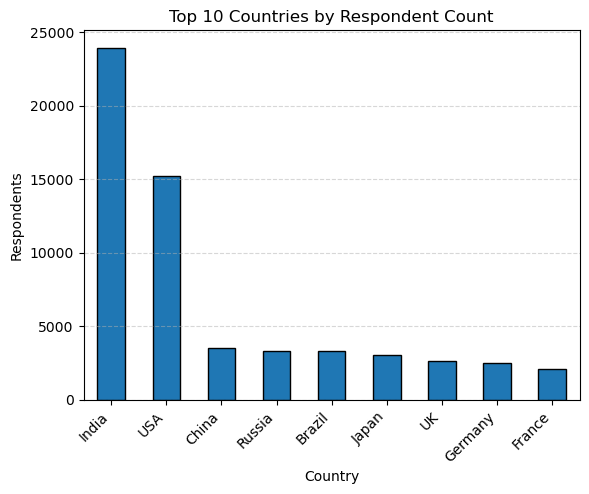

In [103]:
if "country_top10" in df.columns:
    top10_counts = df["country_top10"].value_counts().loc[lambda s: s.index != "Other"].head(10)
    top10_counts.plot(kind="bar", edgecolor="black")
    plt.title("Top 10 Countries by Respondent Count")
    plt.xlabel("Country"); plt.ylabel("Respondents")
    plt.xticks(rotation=45, ha="right"); plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### Top 10 Countries  
This chart highlights the top 10 countries with the most survey respondents (excluding “Other”).
It shows where the majority of participants are concentrated, helping us identify countries with the highest engagement in the dataset.  


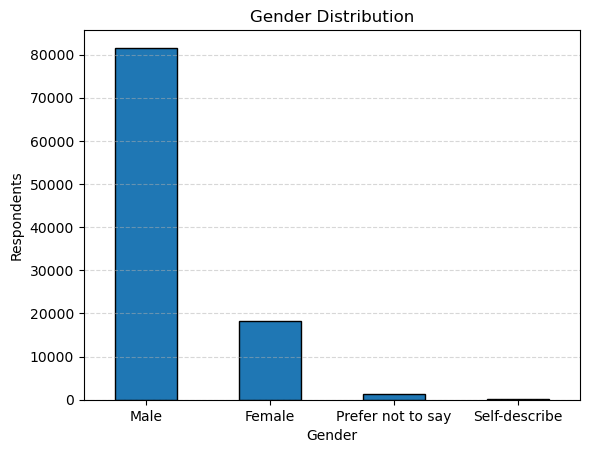

In [104]:
if "gender" in df.columns:
    g = df["gender"].value_counts().head(4)
    g.plot(kind="bar", edgecolor="black")
    plt.title("Gender Distribution"); plt.xlabel("Gender"); plt.ylabel("Respondents")
    plt.xticks(rotation=0); plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### Gender Distribution  
The gender distribution chart provides an overview of the representation of male, female, and other gender groups in the survey. It makes it easy to see which gender dominates the responses and how balanced the dataset is.  

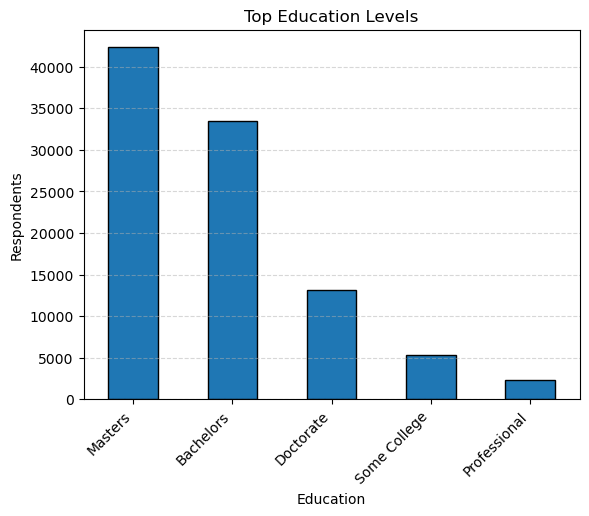

In [105]:
if "education" in df.columns:
    edu = df["education"].value_counts().head(5)
    edu.plot(kind="bar", edgecolor="black")
    plt.title("Top Education Levels"); plt.xlabel("Education"); plt.ylabel("Respondents")
    plt.xticks(rotation=45, ha="right"); plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### Education (Top 5)  
This visualization displays the top 5 most common education levels among respondents. It highlights whether the dataset is dominated by bachelors, masters, or advanced degree holders, giving insights into the academic background of participants. 

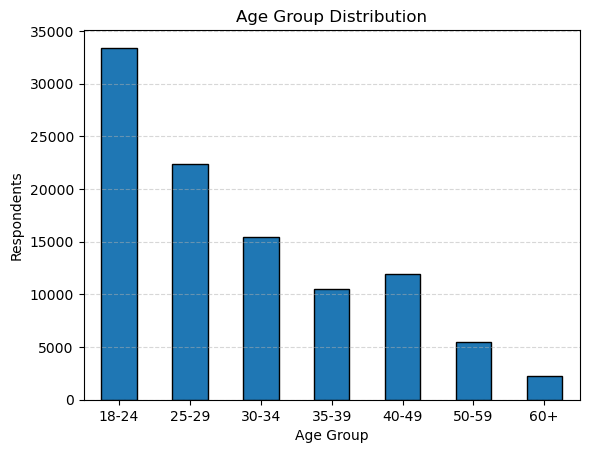

In [106]:
# 3) Age groups
if "age_group" in df.columns:
    ag = df["age_group"].value_counts().reindex(
        ["Under 18","18-24","25-29","30-34","35-39","40-49","50-59","60+","Unknown"]
    ).dropna()
    ag.plot(kind="bar", edgecolor="black")
    plt.title("Age Group Distribution"); plt.xlabel("Age Group"); plt.ylabel("Respondents")
    plt.xticks(rotation=0); plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### Age Group Distribution  
This chart shows how respondents are distributed across different age groups. It helps identify which age ranges are most represented in the survey, highlighting whether the dataset is dominated by younger or older participants.  

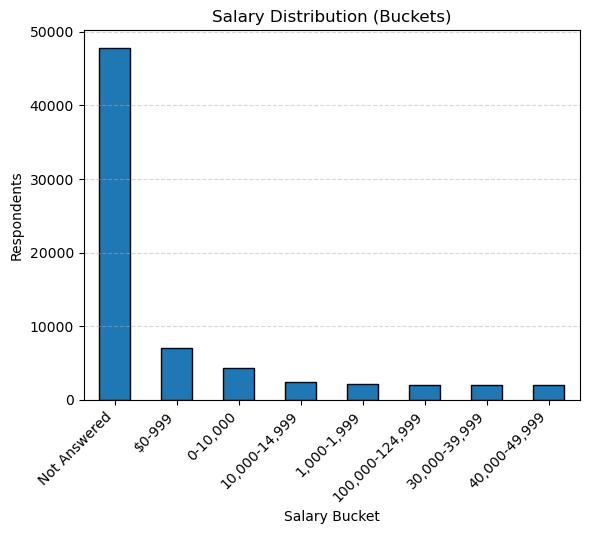

In [107]:
if "salary_bucket" in df.columns:
    sb = df["salary_bucket"].value_counts().head(8)
    sb.plot(kind="bar", edgecolor="black")
    plt.title("Salary Distribution (Buckets)"); plt.xlabel("Salary Bucket"); plt.ylabel("Respondents")
    plt.xticks(rotation=45, ha="right"); plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### Salary Buckets  
The salary bucket chart shows how respondents are spread across different income ranges. It helps in understanding the earning capacity of participants and identifying which salary ranges are most common in the dataset.  

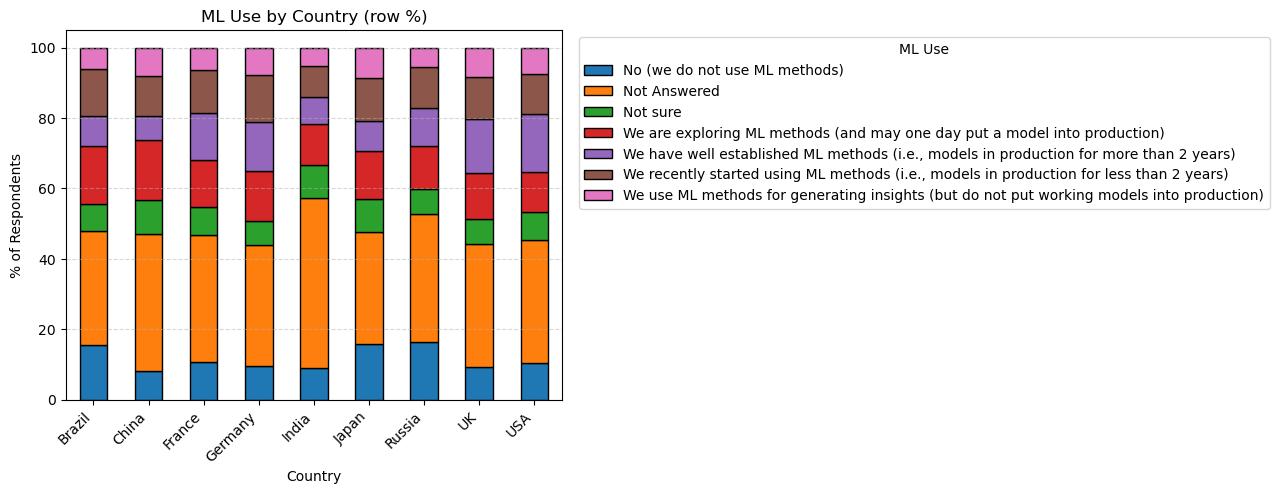

In [108]:
if set(["country_top10","ml_use"]).issubset(df.columns):
    tmp = df[df["country_top10"] != "Other"]
    ct = pd.crosstab(tmp["country_top10"], tmp["ml_use"], normalize="index") * 100
    ct = ct[sorted(ct.columns)]  
    ax = ct.plot(kind="bar", stacked=True, edgecolor="black")
    plt.title("ML Use by Country (row %)")
    plt.xlabel("Country"); plt.ylabel("% of Respondents")
    plt.xticks(rotation=45, ha="right"); plt.legend(title="ML Use", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

### ML Use by Country (Top 10)  
This stacked bar chart compares the use of Machine Learning across the top 10 countries. It not only shows which countries have higher adoption of ML but also the percentage split between users and non-users, giving a clear picture of global ML usage patterns.  


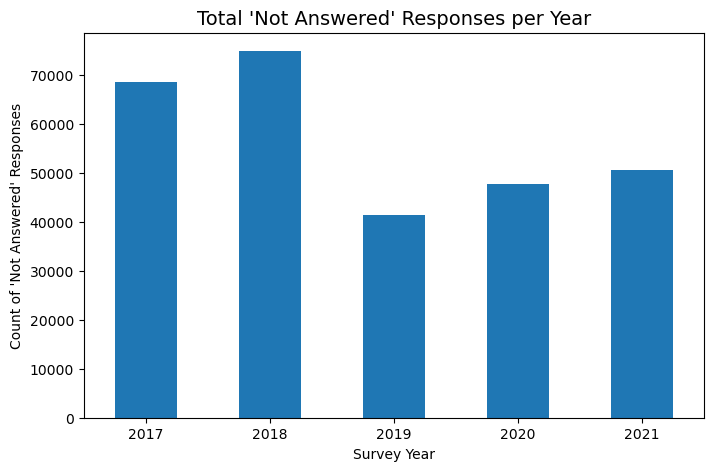

In [109]:
not_answered_summary = (
    (df == "Not Answered")
    .groupby(df["year"])
    .sum()
    .sum(axis=1)
)

# Plot
plt.figure(figsize=(8,5))
not_answered_summary.plot(kind="bar")
plt.title("Total 'Not Answered' Responses per Year", fontsize=14)
plt.xlabel("Survey Year")
plt.ylabel("Count of 'Not Answered' Responses")
plt.xticks(rotation=0)
plt.show()

### Not Answered Responses per Year  
This chart shows the total number of “Not Answered” responses in the survey, grouped by year. It helps identify in which survey years participants skipped more questions, indicating possible data quality or engagement issues.  


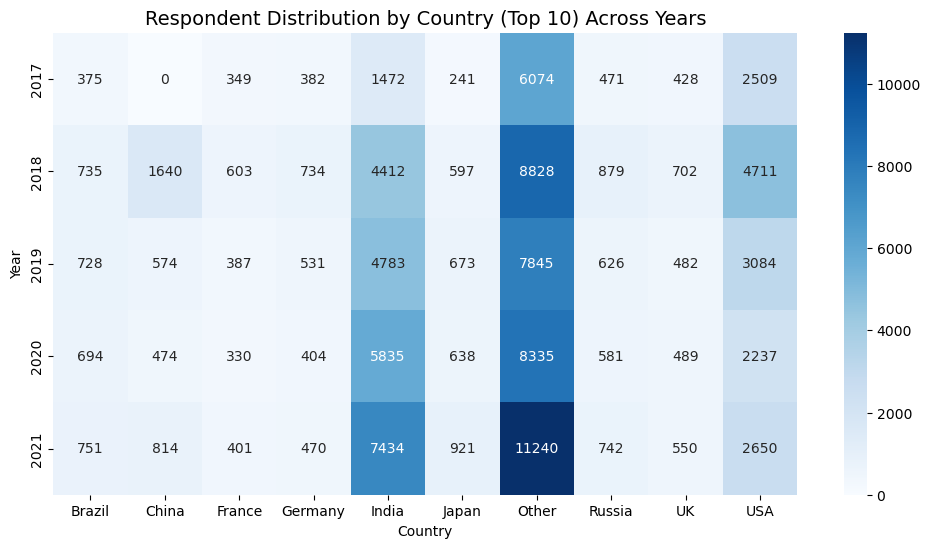

In [110]:
# Top 10 countries overall
top_countries = df["country"].value_counts().nlargest(10).index

# Filter dataset
df_top = df[df["country"].isin(top_countries)]

# Create pivot for heatmap
country_year = pd.crosstab(df_top["year"], df_top["country"])

plt.figure(figsize=(12,6))
sns.heatmap(country_year, cmap="Blues", annot=True, fmt="d")
plt.title("Respondent Distribution by Country (Top 10) Across Years", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Year")
plt.show()


### Respondent Distribution by Country Across Years  
The heatmap compares the top 10 countries with the highest respondents across different survey years. It shows both participation trends over time and variations in respondent count by country, making it easy to spot growth or decline in engagement.  

##                                                       Top 5 Insights 

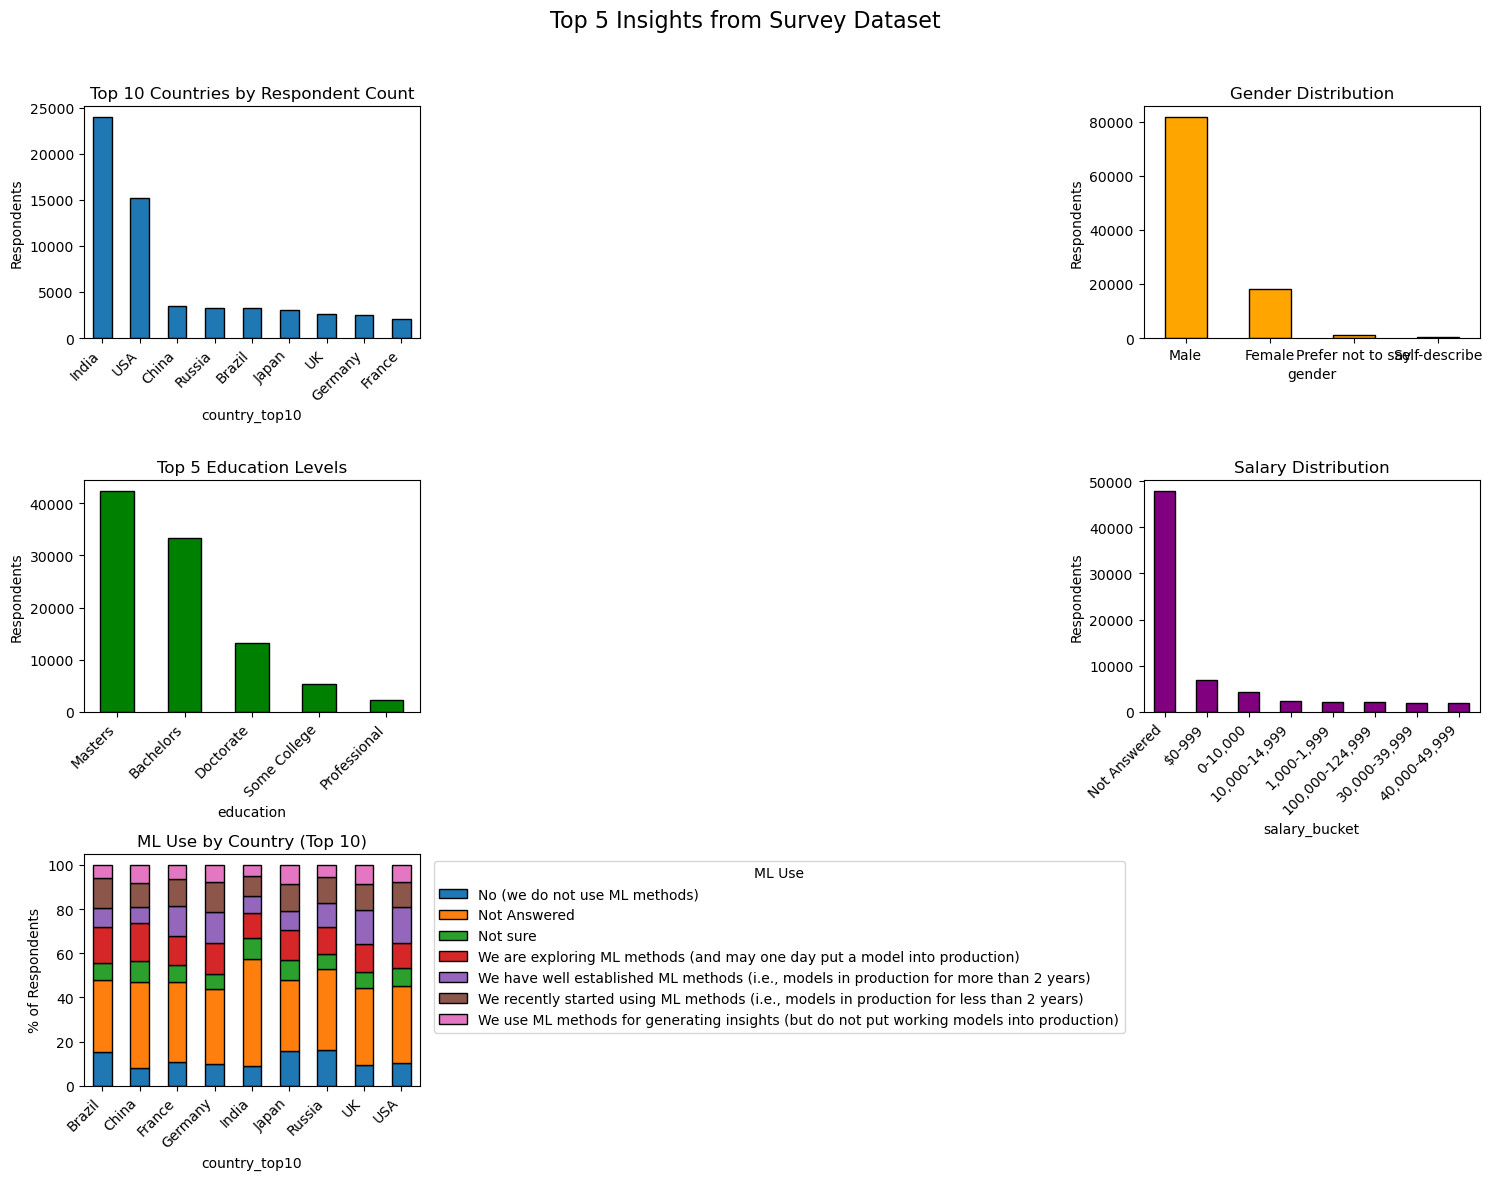

In [113]:
# Top 10 Countries
top10_counts = df['country_top10'].value_counts().loc[lambda s: s.index != "Other"].head(10)

# Gender Distribution
gender_counts = df['gender'].value_counts().head(4)

# Top 5 Education Levels
edu_counts = df['education'].value_counts().head(5)

# Salary Buckets (Top 8)
salary_counts = df['salary_bucket'].value_counts().head(8)

# ML Use by Country (Top 10)
tmp = df[df['country_top10'] != "Other"]
ml_country = pd.crosstab(tmp['country_top10'], tmp['ml_use'], normalize='index')*100
ml_country = ml_country[sorted(ml_country.columns)]

# Create figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Top 5 Insights from Survey Dataset', fontsize=16)

# 1) Top 10 Countries
top10_counts.plot(kind='bar', ax=axs[0,0], edgecolor='black')
axs[0,0].set_title('Top 10 Countries by Respondent Count')
axs[0,0].set_ylabel('Respondents')
axs[0,0].set_xticklabels(top10_counts.index, rotation=45, ha='right')

# 2) Gender Distribution
gender_counts.plot(kind='bar', ax=axs[0,1], edgecolor='black', color='orange')
axs[0,1].set_title('Gender Distribution')
axs[0,1].set_ylabel('Respondents')
axs[0,1].set_xticklabels(gender_counts.index, rotation=0)

# 3) Education Levels
edu_counts.plot(kind='bar', ax=axs[1,0], edgecolor='black', color='green')
axs[1,0].set_title('Top 5 Education Levels')
axs[1,0].set_ylabel('Respondents')
axs[1,0].set_xticklabels(edu_counts.index, rotation=45, ha='right')

# 4) Salary Buckets
salary_counts.plot(kind='bar', ax=axs[1,1], edgecolor='black', color='purple')
axs[1,1].set_title('Salary Distribution')
axs[1,1].set_ylabel('Respondents')
axs[1,1].set_xticklabels(salary_counts.index, rotation=45, ha='right')

# 5) ML Use by Country
ml_country.plot(kind='bar', stacked=True, ax=axs[2,0], edgecolor='black')
axs[2,0].set_title('ML Use by Country (Top 10)')
axs[2,0].set_ylabel('% of Respondents')
axs[2,0].set_xticklabels(ml_country.index, rotation=45, ha='right')
axs[2,0].legend(title='ML Use', bbox_to_anchor=(1.02, 1), loc='upper left')

# Remove empty subplot (bottom right)
fig.delaxes(axs[2,1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Final Insights and Conclusion

After analyzing the survey dataset across multiple dimensions, several key insights emerge:

1. **Geographic Distribution:** The top 10 countries account for the majority of respondents, with some countries consistently showing higher participation across years. This indicates strong engagement from specific regions and highlights potential areas for targeted analysis or outreach.

2. **Demographics:** The dataset shows a predominance of certain age groups and genders, with younger respondents (e.g., 18–34) forming the majority. Education levels also vary, with most respondents holding undergraduate or postgraduate degrees. These patterns help us understand the profile of the survey participants and their potential needs or preferences.

3. **Professional and Salary Insights:** The salary distribution shows that respondents are spread across different income ranges, with certain salary buckets being more common. Combined with education and age data, this provides a clear picture of the professional and economic profile of the respondents.

4. **Survey Participation Quality:** Analysis of “Not Answered” responses by year indicates variations in engagement or survey fatigue. Years with higher non-response rates may require more careful interpretation or highlight areas to improve survey design.

5. **Technology Adoption:** The Machine Learning usage analysis by country reveals notable differences in adoption rates. Some countries show higher engagement with ML, indicating regional variation in technology usage and exposure.

**Conclusion:**  Overall, the survey dataset provides valuable insights into the demographic, geographic, and professional characteristics of respondents, as well as their technology usage patterns. The analysis highlights areas of high engagement and potential gaps, guiding future surveys, decision-making, or targeted strategies. These findings can help organizations better understand their audience, identify trends, and make informed decisions based on respondent behavior and profiles.
